In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix


# Load the dataset
cars_data = pd.read_csv("cars.csv")

# Check the first few rows
cars_data.head(n=5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# get an overview of the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Convert the 'horsepower' column to numeric, coerce errors to NaN, then use mean for values.
cars_data['horsepower'] = pd.to_numeric(cars_data['horsepower'], errors='coerce')
imputer = SimpleImputer(strategy='mean')
cars_data['horsepower'] = imputer.fit_transform(cars_data[['horsepower']])


In [5]:
# One hot encode the origin column
encoder = OneHotEncoder(sparse_output=False)
origin_encoded = encoder.fit_transform(cars_data[['origin']])

# Create a DataFrame from the encoded data
origin_encoded_df = pd.DataFrame(origin_encoded, columns=encoder.get_feature_names_out(['origin']))

# Reset indices to ensure proper alignment
cars_data.reset_index(drop=True, inplace=True)
origin_encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
cars_data_encoded = pd.concat([cars_data, origin_encoded_df], axis=1)

# Drop the original 'origin' column
cars_data_encoded.drop('origin', axis=1, inplace=True)
cars_data = cars_data_encoded


In [6]:
# drop car_name as it is a useless measure for us
cars_data.drop([ 'car name'], axis=1, inplace=True)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin_1      398 non-null    float64
 8   origin_2      398 non-null    float64
 9   origin_3      398 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 31.2 KB


In [7]:
cars_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


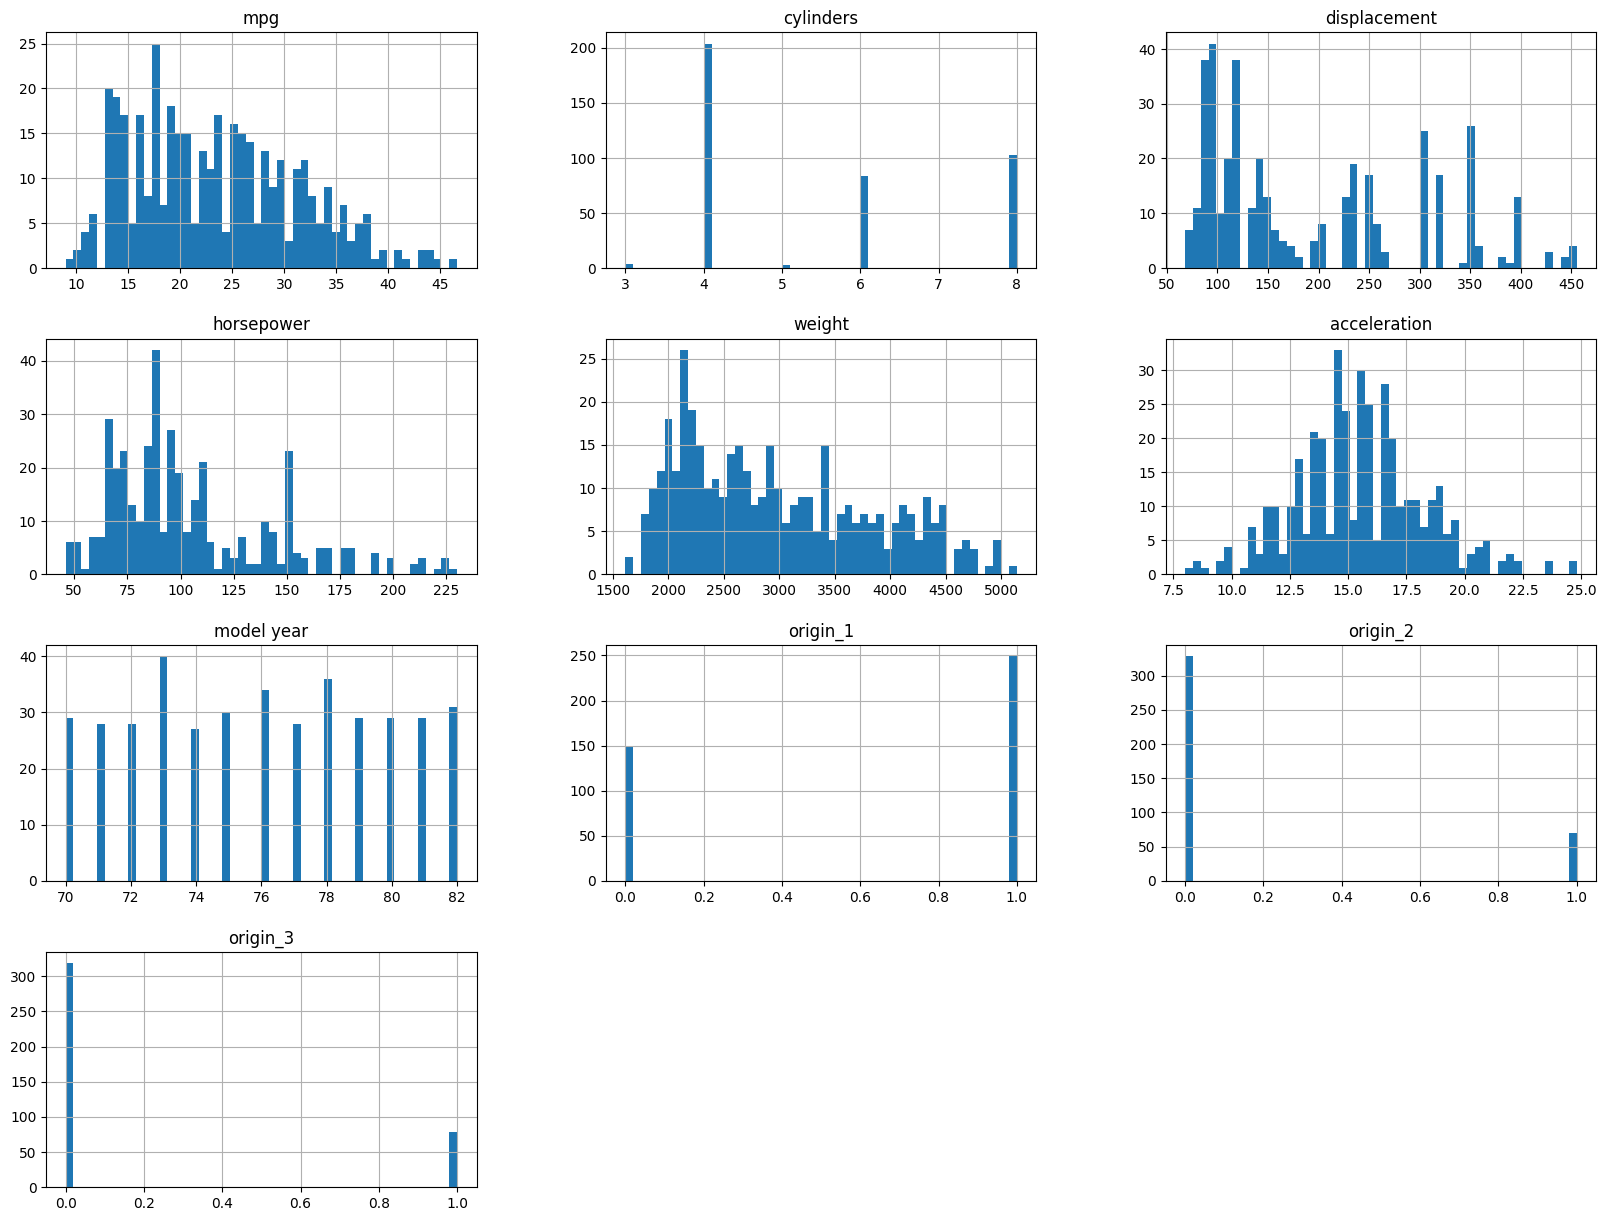

In [8]:
cars_data.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>],
       [<Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>],
       [<Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>],
       [<Axes: xlabel='displacement', ylabel='weight'>,
        <Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='cylinders', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>]], dtype=object)

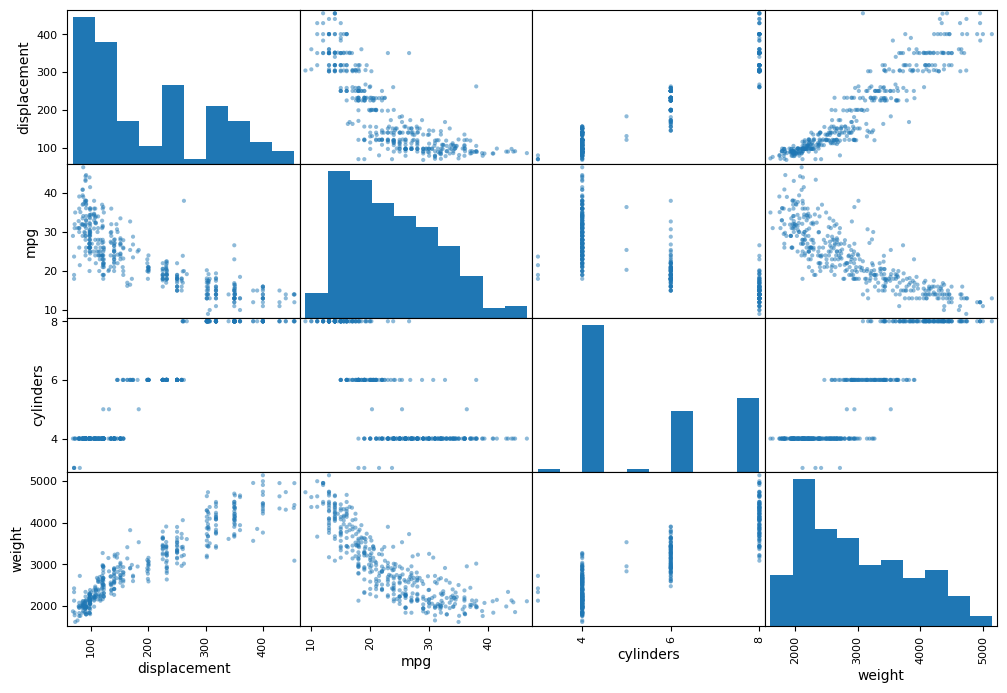

In [9]:
attributes = ["displacement", "mpg", "cylinders",
                  "weight"]
scatter_matrix(cars_data[attributes], figsize=(12, 8))

<Axes: xlabel='mpg', ylabel='displacement'>

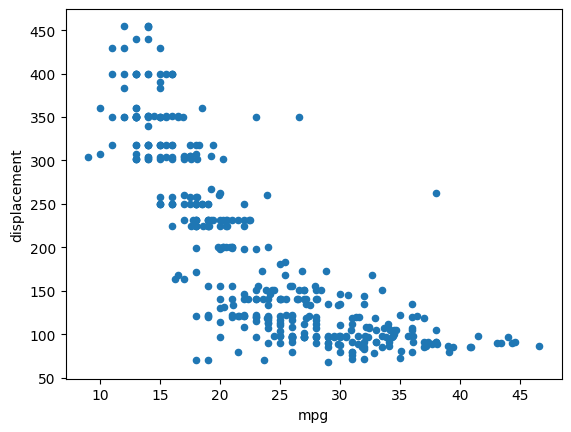

In [10]:
cars_data.plot(kind='scatter', x="mpg", y="displacement")

<Axes: xlabel='cylinders', ylabel='displacement'>

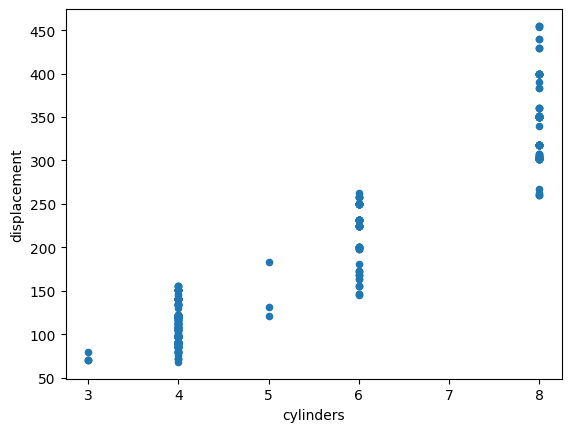

In [11]:
cars_data.plot(kind='scatter', x="cylinders", y="displacement")

<Axes: xlabel='weight', ylabel='displacement'>

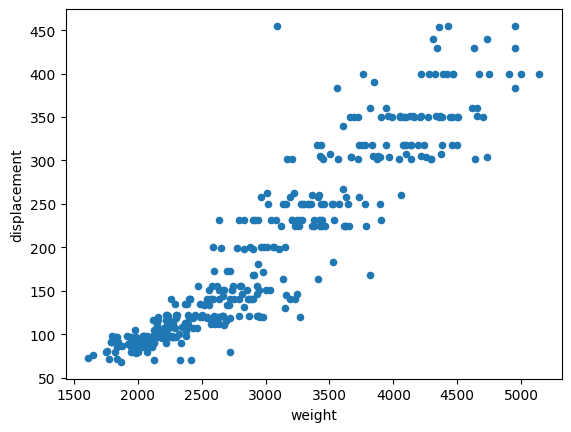

In [12]:
cars_data.plot(kind='scatter', x="weight", y="displacement")

In [13]:
# get the mean of the displacement, we will use this to later create a binary target valriable
mean_displacement = cars_data['displacement'].mean()

# binary target variable for logistic regression
cars_data['large_engine'] = (cars_data['displacement'] > mean_displacement).astype(int)


In [14]:
# split dataset into prediction data and data for the model
data_for_model, prediction_data = train_test_split(cars_data, test_size=0.1, random_state=42)

# Preparing the feature set for the model dataset
X_engine = data_for_model.drop(['displacement', 'large_engine'], axis=1)
y_engine = data_for_model['large_engine']

# Preparing the feature set for the prediction dataset
X_prediction = prediction_data.drop(['displacement', 'large_engine'], axis=1)
y_prediction = prediction_data['large_engine']

In [15]:
# split modeldata into test and training
X_train_engine, X_test_engine, y_train_engine, y_test_engine = train_test_split(
    X_engine, y_engine, test_size=0.2, random_state=42)


In [16]:
# Creating Logistic regression classifier
# Best Parameters: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'tol': 0.0001}
lr_classifier = LogisticRegression(C=100, max_iter=200, penalty="l2", tol=0.001, random_state=42)
lr_classifier.fit(X_train_engine, y_train_engine)


LogisticRegression(C=100, max_iter=200, random_state=42, tol=0.001)

Accuracy of the LogisticRegression model on test data: 0.9861111111111112
Confusion Matrix on Test Data:
[[37  0]
 [ 1 34]]


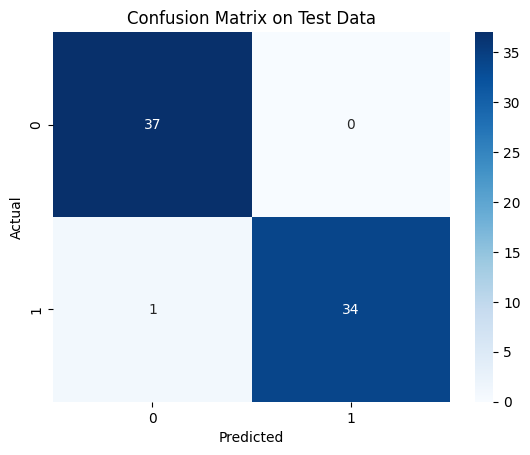

In [17]:

# Evaluate the model on the test data
y_pred_test = lr_classifier.predict(X_test_engine)
accuracy_test = accuracy_score(y_test_engine, y_pred_test)
print(f"Accuracy of the LogisticRegression model on test data: {accuracy_test}")

# Confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test_engine, y_pred_test)
print("Confusion Matrix on Test Data:")
print(conf_matrix_test)

# Plotting the confusion matrix for the test data
sns.heatmap(conf_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.show()


Accuracy of the LogisticRegression model on new data: 0.975
[[21  0]
 [ 1 18]]
(40,)


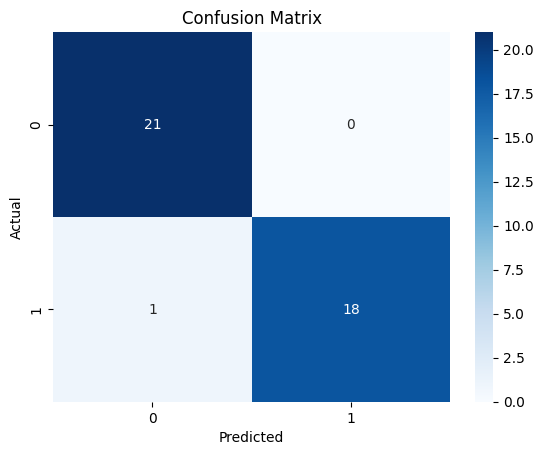

In [18]:

# Predicting on the new, unseen data we extracted earlier
y_pred_engine = lr_classifier.predict(X_prediction)


# Evaluating the model on the new data
accuracy = accuracy_score(y_prediction, y_pred_engine)

print(f"Accuracy of the LogisticRegression model on new data: {accuracy}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_prediction, y_pred_engine)
print(conf_matrix)
print(y_prediction.shape)

# Plotting the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_prediction, y_pred_engine)
print(report)


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X_train_engine, y_train_engine, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [1.         0.98245614 0.98245614 0.96491228 1.        ]


In [20]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2', 'l1', 'none'],   
    'max_iter': [100, 200, 500, 1000],  
    'tol': [1e-4, 1e-3, 1e-2]             
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_engine, y_train_engine)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

Best Parameters: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'tol': 0.0001}
Best Score: 0.9929824561403509


/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about th